In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('twitch_tv.csv')

In [3]:
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,469,Application Data
1,2,0.000023,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,64:ff9b::36e6:a86c,TCP,72,49666 > 443 [ACK] Seq=1 Ack=398 Win=2041 Len...
2,3,0.000035,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,103,Application Data
3,4,0.000230,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TCP,103,"[TCP Retransmission] 443 > 49666 [PSH, ACK] ..."
4,5,0.000273,64:ff9b::924b:32a7,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,426,"Application Data, Application Data"


In [4]:
data1 = data
data1.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,469,Application Data
1,2,0.000023,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,64:ff9b::36e6:a86c,TCP,72,49666 > 443 [ACK] Seq=1 Ack=398 Win=2041 Len...
2,3,0.000035,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,103,Application Data
3,4,0.000230,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TCP,103,"[TCP Retransmission] 443 > 49666 [PSH, ACK] ..."
4,5,0.000273,64:ff9b::924b:32a7,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,426,"Application Data, Application Data"


In [5]:
data1 = data1.drop(['No.', 'Protocol', 'Info'], axis = 1)
data1.head()

,Time,Source,Destination,Length
0,0.000000,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,469
1,0.000023,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,64:ff9b::36e6:a86c,72
2,0.000035,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,103
3,0.000230,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,103
4,0.000273,64:ff9b::924b:32a7,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,426


In [6]:
p = data1.Source.str.startswith('64')
data1.loc[p, 'Source'] = 'phone'
p = data1.Destination.str.startswith('64')
data1.loc[p, 'Destination'] = 'phone'

In [7]:
b = data1.Source.str.contains(':')
data1.loc[b, 'Source'] = 'base'
b = data1.Destination.str.contains(':')
data1.loc[b, 'Destination'] = 'base'

In [8]:
data1['Link'] = data1.apply(lambda a: "UL" if a.Source == 'phone' else "DL", axis = 1)

In [9]:
ul = []
dl = []
columns = ['time', 'traffic']

for i in data1.values:
    if i[4] == "UL":
        ul.append([i[0], int(i[3])])
    elif i[4] == "DL":
        dl.append([i[0], int(i[3])])

ul = np.array(ul)
dl = np.array(dl)

In [10]:
a = np.arange(1, 3716)    # 기록 시간
a = set(a)
b = []
ult = ul.T[0]
for i in ult:
    b.append(int(i))
b = set(b)
print(a-b)

{3585, 1029, 1030, 3591, 525, 530, 531, 3606, 542, 3618, 1060, 40, 3624, 47, 1595, 1087, 3140, 1093, 2118, 1613, 591, 2127, 3678, 1129, 618, 1135, 2674, 627, 3715, 2193, 3224, 164, 2214, 1198, 176, 1211, 3260, 2238, 194, 1219, 3269, 2247, 3272, 1228, 206, 2256, 2257, 1748, 3284, 3285, 2776, 732, 2782, 2783, 1769, 1770, 3308, 3309, 756, 248, 1802, 2316, 2317, 2322, 2323, 2328, 1312, 1318, 1319, 2875, 834, 835, 2376, 1354, 2388, 858, 859, 2418, 2938, 384, 2433, 3464, 398, 399, 2448, 2449, 3476, 3488, 3489, 3507, 2998, 2999, 440, 441, 2490, 2491, 3004, 3005, 3512, 3513, 960, 2496, 1474, 3519, 2515, 2007, 984, 985, 3549, 2019, 3561, 491, 3053, 494, 3065}


In [11]:
ul_bitrate = []
dl_bitrate = []

tps = 0    # traffic per second
cnt = 1
not_measured = list(a-b)

for i, j in ul:
    time = i
    traffic = j
    
    tps += traffic

    if int(i) == cnt:
        tps = tps * 8 / 1000
        ul_bitrate.append([cnt, tps])
        cnt += 1
        tps = 0
    if cnt in not_measured:
        cnt += 1
    
    if i == len(ul) - 1:
        tps = tps * 8 / 1000
        ul_bitrate.append([cnt, tps])

In [12]:
a = np.arange(1, 3716)
a = set(a)
b = []
dlt = dl.T[0]
for i in dlt:
    b.append(int(i))
b = set(b)
print(a-b)

{2433, 3715, 1029, 3464, 2316, 398, 1038, 2448, 530, 2322, 2328, 25, 2329, 542, 3488, 1318, 40, 52, 182, 1462, 440, 2998, 2490, 2875, 3004, 3512, 2496, 834, 1474, 2376, 1354, 2256, 2388, 3284, 984, 2776, 858, 2782, 2019, 2024, 1769, 107, 491, 3308, 494, 2418, 2938}


In [13]:
tps = 0    # traffic per second
cnt = 1
not_measured = list(a-b)

for i, j in dl:
    time = i
    traffic = j
    
    tps += traffic

    if int(i) == cnt:
        tps = tps * 8 / 1000
        dl_bitrate.append([cnt, tps])
        cnt += 1
        tps = 0
    if cnt in not_measured:
        cnt += 1
    
    if i == len(dl) - 1:
        tps = tps * 8 / 1000
        dl_bitrate.append([cnt, tps])

In [14]:
ul_bitrate = np.array(ul_bitrate)
dl_bitrate = np.array(dl_bitrate)

In [15]:
df = pd.DataFrame(ul_bitrate)
df

,0,1
0,1.0,29.808
1,2.0,24.024
2,3.0,10.536
3,4.0,15.280
4,5.0,3.760
...,...,...
3595,3710.0,5.536
3596,3711.0,5683.960
3597,3712.0,2077.760
3598,3713.0,14.600


In [16]:
seq= df[[1]].to_numpy()
seq

array([[2.980800e+01],
       [2.402400e+01],
       [1.053600e+01],
       ...,
       [2.077760e+03],
       [1.460000e+01],
       [1.459644e+04]])

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
            for d in range(order[1]):
                 for q in range(order[2]):
                        model = ARIMA(data, order=(p,d,q))
                        try:
                            model_fit = model.fit()
                            c_order = f'p{p} d{d} q{q}'
                            aic = model_fit.aic
                            bic = model_fit.bic
                            order_list.append(c_order)
                            aic_list.append(aic)
                            bic_list.append(bic)
                        except:
                            pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [ ]:
my_auto_arima(seq,[3,3,3])

C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3600
Model:                     ARMA(2, 2)   Log Likelihood              -34781.197
Method:                       css-mle   S.D. of innovations           3798.559
Date:                Tue, 03 May 2022   AIC                          69574.395
Time:                        22:51:54   BIC                          69611.527
Sample:                             0   HQIC                         69587.628
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3836.1180     20.226    189.665      0.000    3796.476    3875.760
ar.L1.y       -0.5283      0.027    -19.416      0.000      -0.582      -0.475
ar.L2.y       -0.3280      0.020    -16.281      0.0

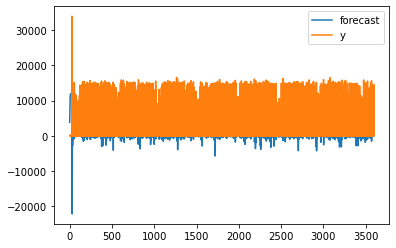

In [29]:
model = ARIMA(seq, (2,0,2))
model_fit = model.fit()
print(model_fit.summary())
model_fit.plot_predict()
plt.show()

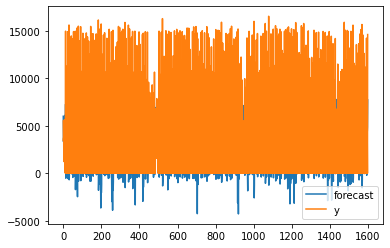

In [31]:
model_fit.plot_predict(start=2000)
plt.show()

In [32]:
from pmdarima.arima import auto_arima

model_arima= auto_arima(seq,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(seq)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=73087.826, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=73032.083, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=72731.646, Time=0.41 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=72379.366, Time=0.60 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=73015.151, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=4.26 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=4.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=72870.654, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.58 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=5.90 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=9.54 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=71254.270, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=4.21 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=3.40 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]       

ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
model = ARIMA(seq, order=(3,0,0))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3600
Model:                     ARMA(3, 0)   Log Likelihood              -34862.793
Method:                       css-mle   S.D. of innovations           3885.737
Date:                Tue, 03 May 2022   AIC                          69735.587
Time:                        22:54:37   BIC                          69766.530
Sample:                             0   HQIC                         69746.614
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3836.1179     32.762    117.090      0.000    3771.905    3900.330
ar.L1.y       -0.5579      0.017    -33.479      0.000      -0.591      -0.525
ar.L2.y       -0.4687      0.017    -26.918      0.0

C:\Users\o9906\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


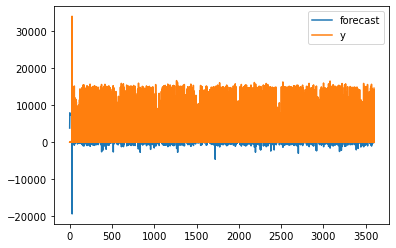

In [34]:
model_fit.plot_predict(dynamic=False)

plt.show()

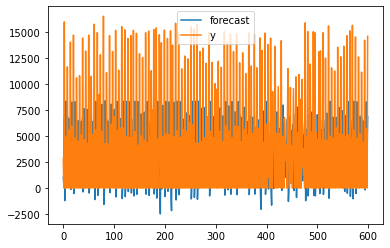

In [35]:
model_fit.plot_predict(start=3000)
plt.show()